In [7]:
import numpy as np
import pathlib
import cv2
import pandas as pd
import os
import glob
from PIL import Image

In [8]:
dir_path = "./pseudo_data_final_box_big"

In [9]:
train_file_path = os.path.join(dir_path, "sub-train-annotations-bbox.csv")
train_csv = pd.read_csv(train_file_path)

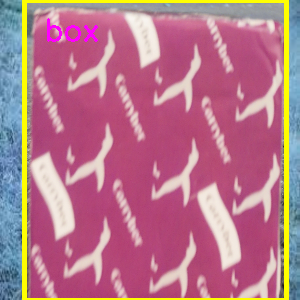

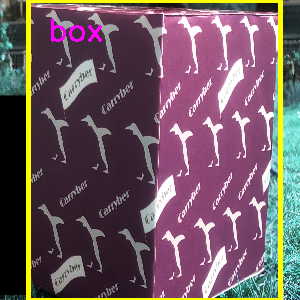

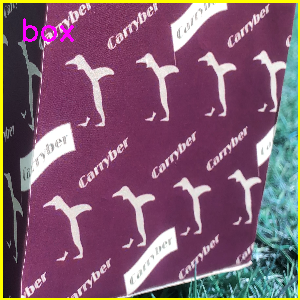

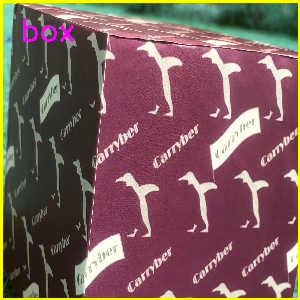

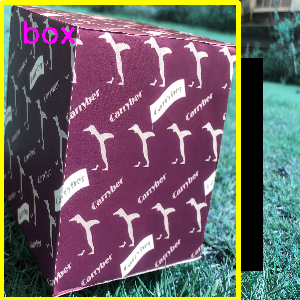

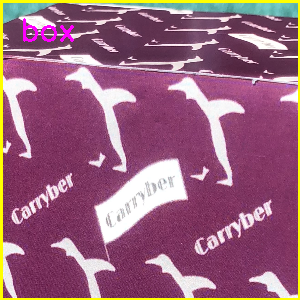

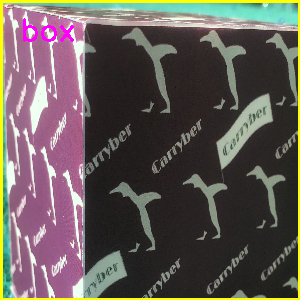

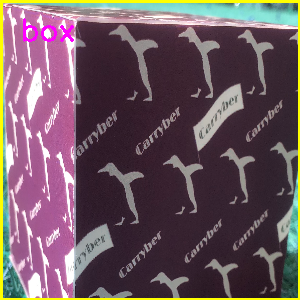

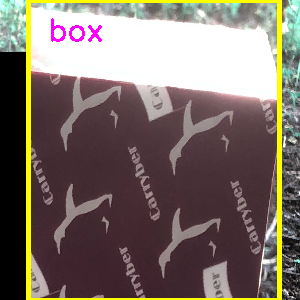

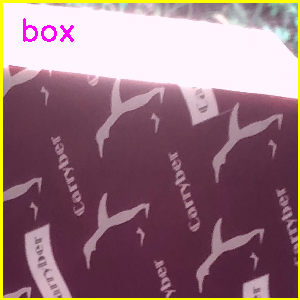

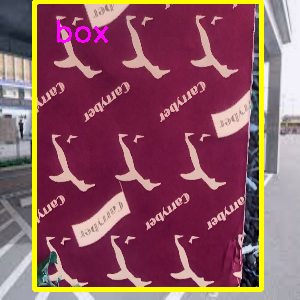

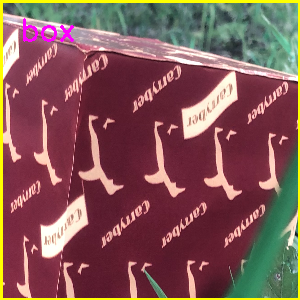

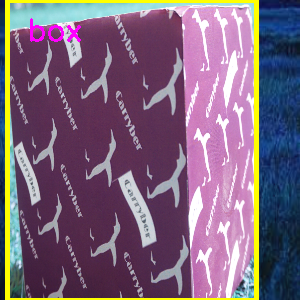

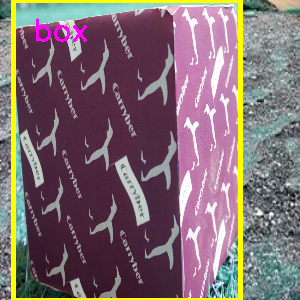

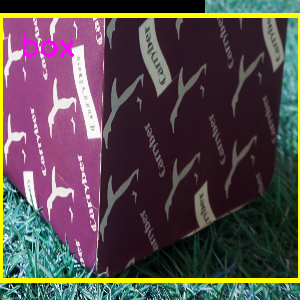

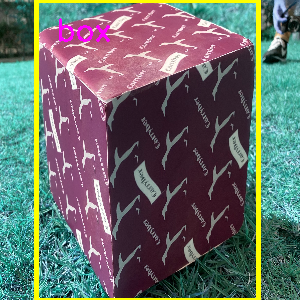

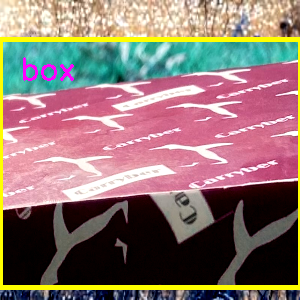

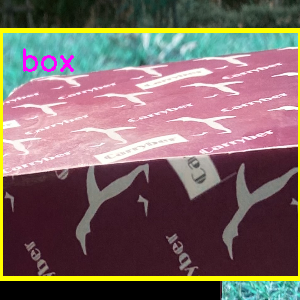

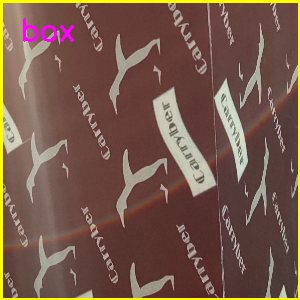

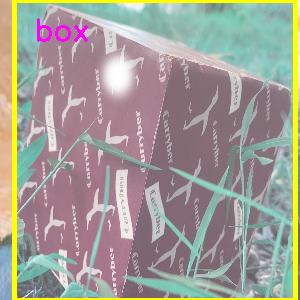

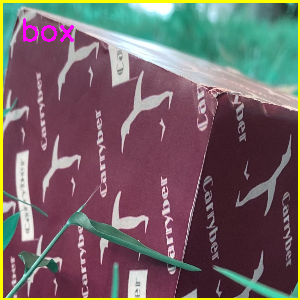

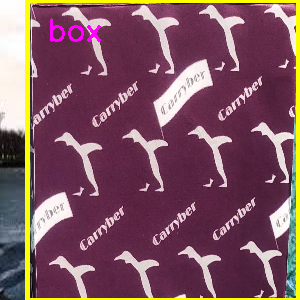

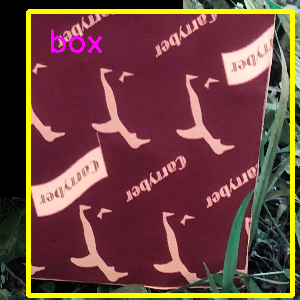

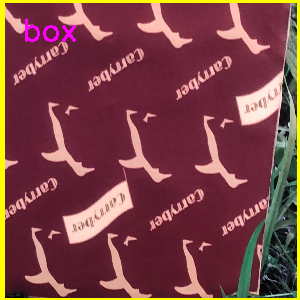

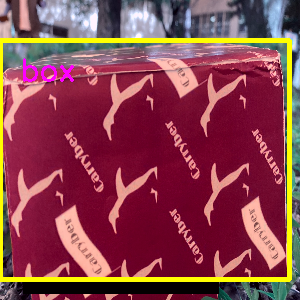

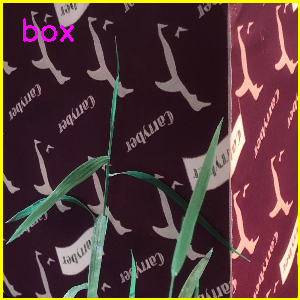

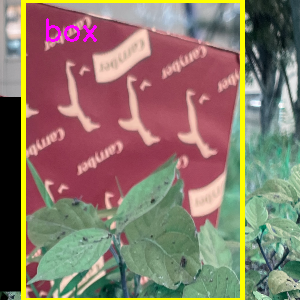

In [17]:
count = 0
im_csv = train_csv[train_csv["ClassName"] == "box"]
for _, row in im_csv.iterrows():
    w = 300
    h = 300
    img_path = row["ImageID"]
    x1 = int(row["XMin"] * w)
    x2 = int(row["XMax"] * w)
    y1 = int(row["YMin"] * h)
    y2 = int(row["YMax"] * h)
    if not ((x2-x1) * (y2 - y1) > h * w * 0.6):
        #print(img_path)
        continue
        
    img = cv2.imread(img_path)
    img = cv2.resize(img, (300, 300))
    h, w = img.shape[:2]
    if (x2-x1) * (y2 - y1) > h * w * 0.7:
        label = row["ClassName"]
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 255, 0), 4)
        cv2.putText(img, label,
                    (int(x1) + 20, int(y1) + 40),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1,  # font scale
                    (255, 0, 255),
                    2)  # line type
        display(Image.fromarray(img))
        count += 1

In [18]:
print(count)

27


In [4]:
def display_annotation():
    img = cv2.imread(img_path)
    img = cv2.resize(img, (300, 300))
    h, w = img.shape[:2]
    im_csv = train_csv[train_csv['ImageID'] == img_path]
    #im_csv = im_csv[im_csv["ClassName"] == "box"]
    print(im_csv)
    for _, row in im_csv.iterrows():
        x1 = int(row["XMin"] * w)
        x2 = int(row["XMax"] * w)
        y1 = int(row["YMin"] * h)
        y2 = int(row["YMax"] * h)
        label = row["ClassName"]
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 255, 0), 4)
        cv2.putText(img, label,
                    (int(x1) + 20, int(y1) + 40),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1,  # font scale
                    (255, 0, 255),
                    2)  # line type
    display(Image.fromarray(img))

In [5]:
pic_paths  = train_csv["ImageID"].unique()
start = 0 #start index
interval = 1 #一度に表示させるもの

./pseudo_data_final/IMG_8337_0.png
                              ImageID             LabelName  Confidence  \
0  ./pseudo_data_final/IMG_8337_0.png  takadamaLab_carryber         1.0   

       XMin     XMax      YMin      YMax    ClassName  
0  0.227011  0.31908  0.262222  0.472031  trafficcone  


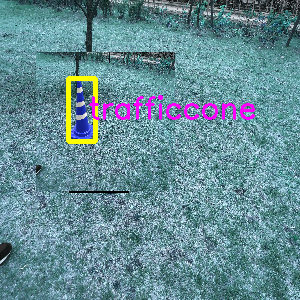

In [6]:
for path in pic_paths[start:start+interval]:
    print(path)
    display_annotation(path)
    start += interval